Tutorial on YouTube Chanel:
Text Visualization | Lecture 2 | CPE 393 Text Analytics
https://www.youtube.com/watch?v=rAQCQKnkNh0&t=774s

##### <b>Load Dataset</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv('un-general-debates.csv')
df.sample(5)

,session,year,country,text
518,40,1985,TTO,"It is a pleasure for me, on behalf of the Gove..."
5332,29,1974,YEM,My delegation was very much moved by the sad n...
6219,47,1992,TCD,In addressing the \nGeneral Assembly this afte...
5105,66,2011,MAR,It \nis a great pleasure for me to extend to M...
636,63,2008,GRC,Sophocles said that all mankind is subject to ...


In [4]:
df.count()

session    7507
year       7507
country    7507
text       7507
dtype: int64

In [5]:
# Primary key

df[['session', 'country']].drop_duplicates().count()

session    7507
country    7507
dtype: int64

##### <b>DataFrame Summary Statistics</b>

In [6]:
df['length'] = df['text'].str.len()

In [7]:
df.columns

Index(['session', 'year', 'country', 'text', 'length'], dtype='object')

In [8]:
df.dtypes

session     int64
year        int64
country    object
text       object
length      int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
 4   length   7507 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 293.4+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [11]:
df[['country']].describe(include='O').T

,count,unique,top,freq
country,7507,199,IRN,46


##### <b>Check Missing Data</b>

In [12]:
df.isna().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

##### <b>Plotting distribution</b>

<AxesSubplot:>

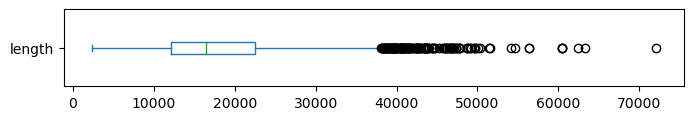

In [13]:
df['length'].plot(kind='box', vert=False, figsize=(8,1))

<AxesSubplot:ylabel='Frequency'>

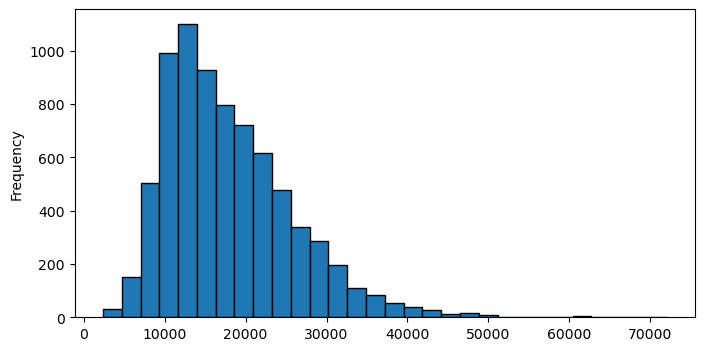

In [14]:
df['length'].plot(kind='hist', bins=30, figsize=(8,4), edgecolor='k')

##### <b>Distribution across categories</b>

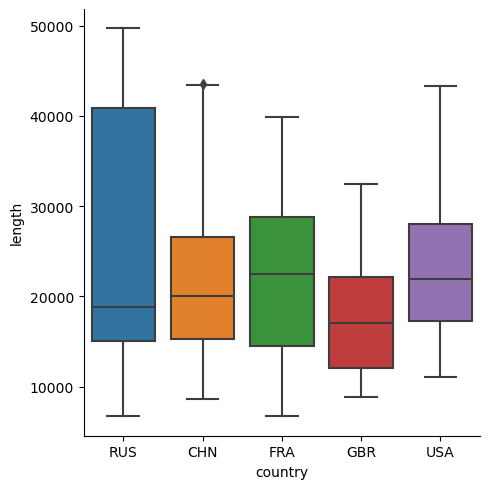

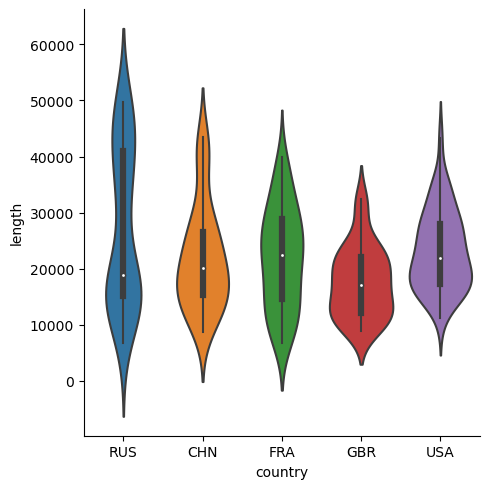

In [15]:
import seaborn as sns

where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')

##### <b>Developement over time Number of countries</b>

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

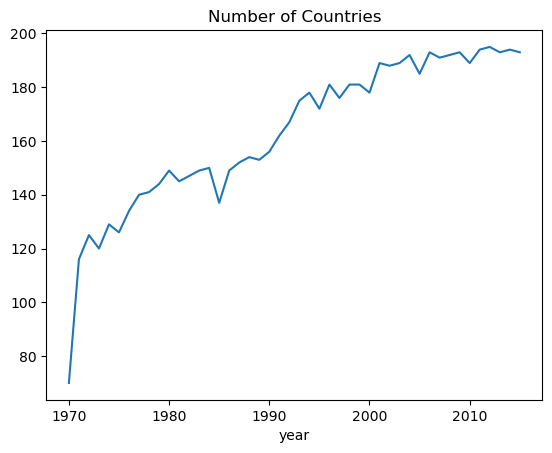

In [16]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

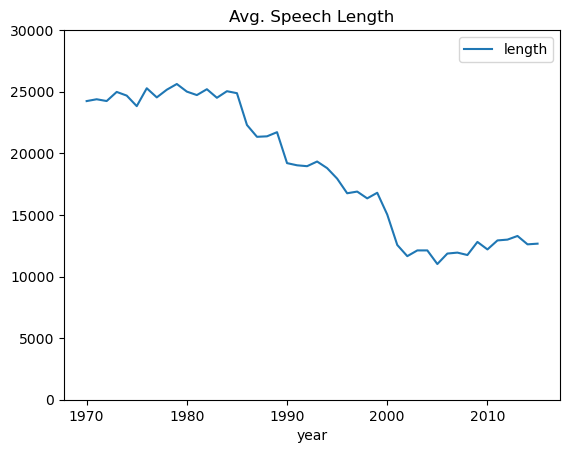

In [17]:
df.groupby('year').agg({'length':'mean'}).plot(title='Avg. Speech Length', ylim=(0,30000))

##### <b>Simple Text Processing</b>

In [18]:
# Case Folding
str.lower('Hello World')

'hello world'

In [19]:
# Tokenization

import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [20]:
text = "Let's defeat SARS-Coc-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-Coc-2|together|in


In [21]:
# Stop word removal
import nltk
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [23]:
remove_stop(tokens)

['Let', 'defeat', 'SARS-Coc-2', 'together']

In [24]:
# Processing a pipeline

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [25]:
prepare(text, pipeline)

['let', 'defeat', 'sars-coc-2', 'together']

In [26]:
# Apply pipeline

# Series: map
# Series: map
# DaraFrame: applymap
# DataFrame: applymap

df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)
df.sample(10)

,session,year,country,text,length,tokens
4123,37,1982,HND,On behalf of the people and Government of Hond...,26513,"[behalf, people, government, honduras, like, s..."
6940,61,2006,JPN,I wish to congratulate Her \nExcellency Sheikh...,14953,"[wish, congratulate, excellency, sheikha, haya..."
5891,36,1981,YUG,"192.\tMr. President, may I congratulate you on...",16162,"[mr, president, may, congratulate, election, h..."
5396,70,2015,DZA,"On behalf of Algeria, I would like to warmly c...",10565,"[behalf, algeria, would, like, warmly, congrat..."
4773,35,1980,PHL,﻿My delegation joins our colleagues in congrat...,16155,"[delegation, joins, colleagues, congratulating..."
6180,55,2000,KEN,Let me begin by\ncongratulating the President ...,17200,"[let, begin, congratulating, president, behalf..."
893,46,1991,RWA,﻿It Is a great honour for me and the entire Rw...,35264,"[great, honour, entire, rwandese, delegation, ..."
1868,52,1997,JPN,﻿I should like\nat the outset to extend my war...,14401,"[like, outset, extend, warmest, compliments, e..."
2232,65,2010,PRK,"Mr. President, on behalf of the \ndelegation o...",11478,"[mr, president, behalf, delegation, democratic..."
6372,45,1990,BEN,"﻿Sir, allow me, first of all, to follow the ex...",24783,"[sir, allow, first, follow, example, eminent, ..."


In [27]:
# Counting number of tokens (words)
df['num_tokens'] = df['tokens'].map(len)
df.sample(10)

,session,year,country,text,length,tokens,num_tokens
5897,36,1981,NPL,\n\n\n150.\t It is my privilege to convey to r...,19802,"[privilege, convey, representatives, greetings...",1643
4171,53,1998,COM,"Allow me at the outset, Mr. President, on beha...",7798,"[allow, outset, mr, president, behalf, people,...",629
597,63,2008,WSM,The United Nations \nembodies multilateralism....,12195,"[united, nations, embodies, multilateralism, l...",1018
4708,35,1980,VCT,﻿I wish to endorse the sentiments expressed by...,21382,"[wish, endorse, sentiments, expressed, prime, ...",1743
3398,34,1979,GBR,﻿This is the first time that I have had the ho...,22171,"[first, time, honour, addressing, united, nati...",1818
1866,52,1997,MCO,﻿It is a great pleasure for me to congratulate...,12462,"[great, pleasure, congratulate, sir, outstandi...",1041
5394,70,2015,KIR,It is an honour and a privilege to address thi...,14236,"[honour, privilege, address, historic, seventi...",1216
1875,52,1997,BEL,"﻿At the outset, allow me to take this opportun...",15078,"[outset, allow, take, opportunity, congratulat...",1239
814,46,1991,ROU,﻿I wish first of all to convey to Mr. Samir Sh...,20795,"[wish, first, convey, mr, samir, shihabl, cong...",1736
1292,30,1975,GUY,"1.\t It is with great pleasure, Mr, President...",24372,"[great, pleasure, mr, president, congratulate,...",1951


##### <b>Word Frequency Analysis</b>

In [28]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")
counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [29]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [30]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
# print(counter)
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 1.85 s


In [31]:
%%time
counter = Counter()
df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 1.19 s


In [32]:
# Word Counting, DataFrame Version

def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # tranform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('freq', ascending=False)

In [33]:
freq_df = count_words(df)
freq_df.head(5)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [34]:
# Counting words with preprocessing

# Count words with 10 or more characters
count_words(df, column='text',
            preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
Documentation,3
instrumentation,3
Reorganization,3


##### <b>Frequency Plot</b>

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

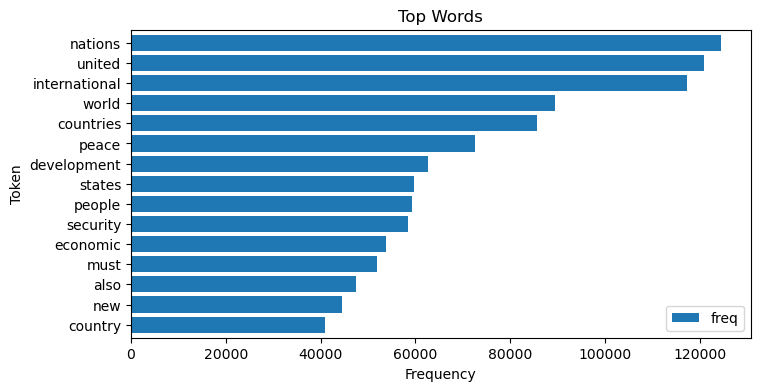

In [35]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

##### <b>Word Cloud</b>

In [36]:
!pip install wordcloud

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

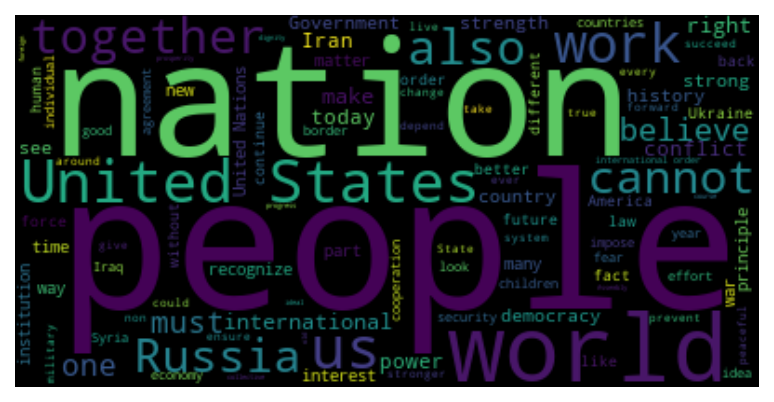

In [38]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

##### <b>Keyword-in-Context Function</b>

In [39]:
from textacy.extract.kwic import keyword_in_context

In [40]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_sample=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))

    kwic_list = []
    doc_series.map(add_kwic)

    if print_sample is None or print_sample==0:
        return kwic_list
    else:
        k = min(print_sample, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + ' ' + \
                  sample[1] + ' ' + \
                    re.sub(r'[\n\t]', ' '. sample[2]))

In [43]:
kwic(df[df['year']==2005]['text'], 'sdgs', print_sample=5)

0 random samples out of 0 contexts for 'sdgs':


##### <b>Word Cloud Framework</b>

In [42]:
def wordcloud(word_freq, title=None, max_word=200, stopwords=None):
    wc = WordCloud(width=800, height=400,
                   background_color='black', colormap='Paired',
                   max_font_size=150, max_words=max_word)
    
    # convert data frame into dict